In [ ]:
# Features (types of variables): 

# satisfaction_level (continuous)
# last_evaluation (continuous)
# number_project (continuous)
# average_montly_hours (continuous)
# time_spend_company (continuous)
# Work_accident (binary) 
# promotion_last_5years (binary)
# sales (= department, categorical)
# salary (ordinal)
# left (binary)



# Questions

# Overall
# Which feature influences attrition the most and why? We can tackle the feature. Can't answer the why w/data
# How much does each feature impact attrition? random forest classifier and other models. 
# Are these leavers involuntary vs voluntary? No data.

# Satisfaction - since the Random Forest model indicated this feature has the highest impact on an employee's decision to leave...
# Which department is most satisfied? Do they have the best retention? (They should)
# Are employees with higher levels of satisfaction more likely to be higher performers?
# Are employees with higher levels of satisfaction more likely to have been promoted recently?
# Are employees with higher levels of satisfaction more likely to have more projects? 
# Are employees with higher levels of satisfaction more likely to have longer tenure? 
# Are employees with higher levels of satisfaction more likely to have higher salaries? 
# Are employees with higher levels of satisfaction less likely to have had more work accidents?
# Are employees with higher levels of satisfaction more likely to work less? 

# Department
# Which department has the highest attrition vs lowest attrition? 
# Which department is the most satisfied? 
# Does attrition by department align with the output predicted 
# by Kyle using the Random Forest Classifier
# Do certain departments have more projects than others and why?

# Performance
# Are high performers (as measured by last evaluation) staying? (They should)
# Are high performers more likely to have more projects? (They should)
# Are high performers more likely to have higher salaries? (They should)
# Are high performers more likely to spend more time at the company (They should...) 

# Promotion
# Are those promoted in the last 5 years less likely to leave? (They should)
# Are those promoted in the last 5 years more likely to be high performers? (They should)
# Are those promoted in the last 5 years more likely to have high satisfaction levels? (They should) 
# Are those promoted in the last 5 years more likely to have higher salaries (They should)
# Are those promoted in the last 5 years more likely to spend more time at the company? 

# Tenure
# Does tenure impact leavers? (Predict employees with highest tenure had most leavers in absolute terms)
# Does tenure impact satisfaction? Are employees with higher tenure most satisfied?
# Does tenure impact time spent at company?

# Num of projects
# Does num of projects impact leavers?




ctrl+/ to remove hash in code, then convert to markdown. 
space after asterisk to indicate it's a bullet as opposed to italicizing. double asterisk = bold.
to differentiate prose and a list [of bullets] requires a line.

Satisfaction - since the Random Forest model indicated this feature has the highest impact on an employee's decision to leave... 

* Which department is most satisfied? Do they have the best retention? (They should)
* Are employees with higher levels of satisfaction more likely to be higher performers?
* Are employees with higher levels of satisfaction more likely to have been promoted recently?
* Are employees with higher levels of satisfaction more likely to have more projects? 
* Are employees with higher levels of satisfaction more likely to have longer tenure? 
* Are employees with higher levels of satisfaction more likely to have higher salaries? 
* Are employees with higher levels of satisfaction less likely to have had more work accidents?
* Are employees with higher levels of satisfaction more likely to work less? 

In [24]:
# control + enter to run

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import histogram 

from pandas import DataFrame, Series, read_csv, set_option

In [5]:
# Read in data
data = read_csv('hr_data.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


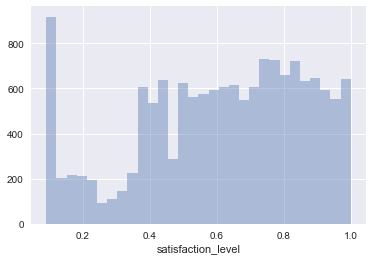

In [9]:
sns.distplot(data['satisfaction_level'], hist=True, kde=False) # kde=False removes the density curve

note that for satisfaction level, there are no 0's. the min is 0.09. why is there that strange lower bound? next we want to checkout how satisfaction is distributed across deparatments. Should we take the average satisfaction? satisfaction distribution is not normal or uniform so average seems fine.

In [13]:
# satisfaction by department

# dept_satis_means = 
data.groupby('sales')['satisfaction_level'].mean()

sales
IT             0.618142
RandD          0.619822
accounting     0.582151
hr             0.598809
management     0.621349
marketing      0.618601
product_mng    0.619634
sales          0.614447
support        0.618300
technical      0.607897
Name: satisfaction_level, dtype: float64

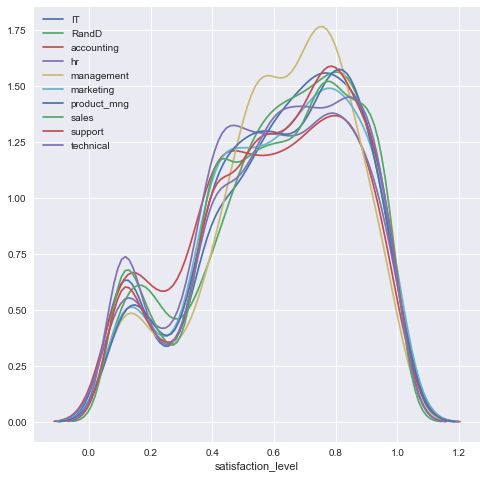

In [21]:
plt.figure(figsize=(8,8)) # w*h
for series_header, series_values in data.groupby('sales')['satisfaction_level']: # iteritems not necessary b/c groupby is an iterable.
    sns.distplot(series_values, label=series_header, hist=False)
plt.legend()

Note that management's satisfaction levels are higher in the middle ranges. This is a gaussian blending of the histogram. I could explicitly define the values of the curve (gaussian kernel) but without doing that seaborne automatically calculates it. we would expect that y-axes to max at 1 (100% of respondents per department. These are raw counts so there could be more respondents in management than in other departments that is forcing up the curve. this is pre-normalized. If I want to see the counts, go back to original data and histogram (e.g. kde=False)). 

I can also define the color map in advance so there is no overlap.

All this graph tells me is that there aren't notable differences across departments; the shape of the curves are similar, therefore the density trends are similar. Therefore, any issues in satisfaction are systematic across the entire company. 

Histogramming: The numpy histogram
A bin in a histogram is the starting and ending x-value of bar. 
when you pass in several different series of data into the function, 
each bin is calculated independently. satisfaction_level bins 
automatically match up b/c the domain is the same (0.09 - 1), however
salary ranges, for ex, would not, across departments. 


In [28]:
# group by department. parsing by satisfication level. 
# normalize each department by dividing by # entries in department 
# then histogram https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html

vals = data.groupby('sales')['satisfaction_level'].apply(lambda x: histogram(x)[0]) 
# if you don't specify [0], result is tuple (value_counts, edges of bins)
vals 
# these show counts in each department's histogram

sales
IT              [122, 29, 38, 122, 112, 147, 162, 185, 164, 146]
RandD                [62, 38, 28, 62, 81, 106, 97, 109, 116, 88]
accounting             [77, 37, 41, 100, 76, 82, 80, 96, 99, 79]
hr                     [62, 27, 25, 115, 73, 91, 72, 99, 89, 86]
management             [45, 19, 18, 50, 73, 96, 84, 108, 83, 54]
marketing          [68, 22, 28, 121, 87, 89, 105, 120, 113, 105]
product_mng         [73, 21, 32, 108, 96, 110, 95, 129, 140, 98]
sales          [364, 149, 111, 529, 405, 459, 464, 594, 538, ...
support         [184, 76, 59, 271, 222, 249, 268, 341, 288, 271]
technical       [278, 80, 97, 300, 246, 346, 341, 334, 368, 330]
Name: satisfaction_level, dtype: object

In [30]:
bins = data.groupby('sales')['satisfaction_level'].apply(lambda x:histogram(x)[1])
bins

sales
IT             [0.09, 0.181, 0.272, 0.363, 0.454, 0.545, 0.63...
RandD          [0.09, 0.181, 0.272, 0.363, 0.454, 0.545, 0.63...
accounting     [0.09, 0.181, 0.272, 0.363, 0.454, 0.545, 0.63...
hr             [0.09, 0.181, 0.272, 0.363, 0.454, 0.545, 0.63...
management     [0.09, 0.181, 0.272, 0.363, 0.454, 0.545, 0.63...
marketing      [0.09, 0.181, 0.272, 0.363, 0.454, 0.545, 0.63...
product_mng    [0.09, 0.181, 0.272, 0.363, 0.454, 0.545, 0.63...
sales          [0.09, 0.181, 0.272, 0.363, 0.454, 0.545, 0.63...
support        [0.09, 0.181, 0.272, 0.363, 0.454, 0.545, 0.63...
technical      [0.09, 0.181, 0.272, 0.363, 0.454, 0.545, 0.63...
Name: satisfaction_level, dtype: object

In [33]:
counts = data.groupby('sales')['satisfaction_level'].count()
counts

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

In [38]:
# pull out counts. process each series by doing counts divided total count of each department

out = {}
for label, series in vals.iteritems():
    out[label] = vals[label]/float(counts[label])

normed_df = DataFrame(data=out) # it takes the dict keys as headers
normed_df # each bin contains the normalized output for each department's satisfaction level at that bin 

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.099430,0.078780,0.100391,0.083897,0.071429,0.079254,0.080931,0.087923,0.082548,0.102206
1,0.023635,0.048285,0.048240,0.036536,0.030159,0.025641,0.023282,0.035990,0.034096,0.029412
2,0.030970,0.035578,0.053455,0.033829,0.028571,0.032634,0.035477,0.026812,0.026469,0.035662
3,0.099430,0.078780,0.130378,0.155616,0.079365,0.141026,0.119734,0.127778,0.121579,0.110294
4,0.091280,0.102922,0.099087,0.098782,0.115873,0.101399,0.106430,0.097826,0.099596,0.090441
5,0.119804,0.134689,0.106910,0.123139,0.152381,0.103730,0.121951,0.110870,0.111709,0.127206
6,0.132029,0.123253,0.104302,0.097429,0.133333,0.122378,0.105322,0.112077,0.120233,0.125368
7,0.150774,0.138501,0.125163,0.133965,0.171429,0.139860,0.143016,0.143478,0.152983,0.122794
8,0.133659,0.147395,0.129074,0.120433,0.131746,0.131702,0.155211,0.129952,0.129206,0.135294
9,0.118989,0.111817,0.102999,0.116373,0.085714,0.122378,0.108647,0.127295,0.121579,0.121324


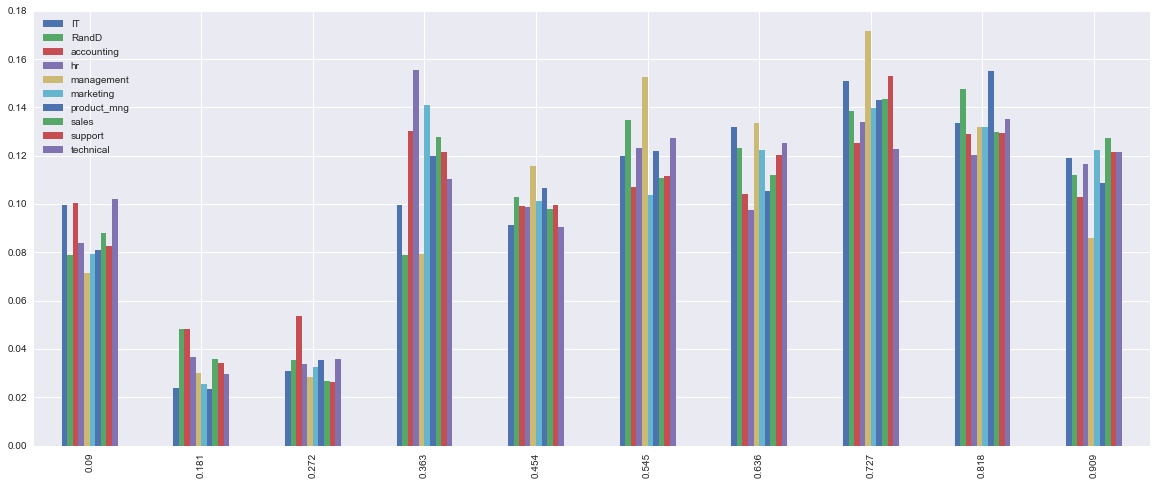

In [48]:
# two ways of proceeding: 
# 1: plot out normed_df. 
# 2: can compare the relative distance from each department to every other department IT = 0, 
# how positive/negative is each department's satisfaction level for every bin?

# pulling out the left edges of each bin (eventually find the means of each set of bin edge)
normed_df.index = bins[0][:-1]

normed_df.plot(kind='bar', figsize=(20,8)) # built in df function for plotting. prob matplotlib. can also do lines, etc.

This is unexpected because I would expect more of a bimodal distribution. people usually love or hate their company. these responses are lukewarm. This raises the question of the response rate?

Post-normalized, Management shows higher med-high levels of satisfaction than other departments do and Management shows lower levels of low satisfaction. However, interestingly, Management has lower levels of high satisfaction than other departments do.    


In [ ]:
# barplot the differences of sat relative to each department.
normed_df.apply(lambda x: normed_df['IT'] - x) 
# x iterates across across each series. because apply iterates over every column if a df, as default